In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [3]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [48]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "GGU" in path: continue
        if "GU112" in path: continue
        if "GU211" in path: continue
        
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        if "Output_GU" in path and "__GU111" in path and "LR" in path:
            data["Scaling"] = "GU" + path.split("__GU")[1].split("/")[0] 
        elif "__GU111" in path: 
            try:
                number = float(path.split("__GU")[1][:6])
            except:
                number = float(path.split("__GU")[1][:5])
            data["Scaling"] = "GU" + str(number)
        
        if "M9" in path: data["Scaling"] += "M9"

        if len(data_) == 0: data_ = data
        else: data_ = pd.concat([data_, data])
    return data_

## BarPlot

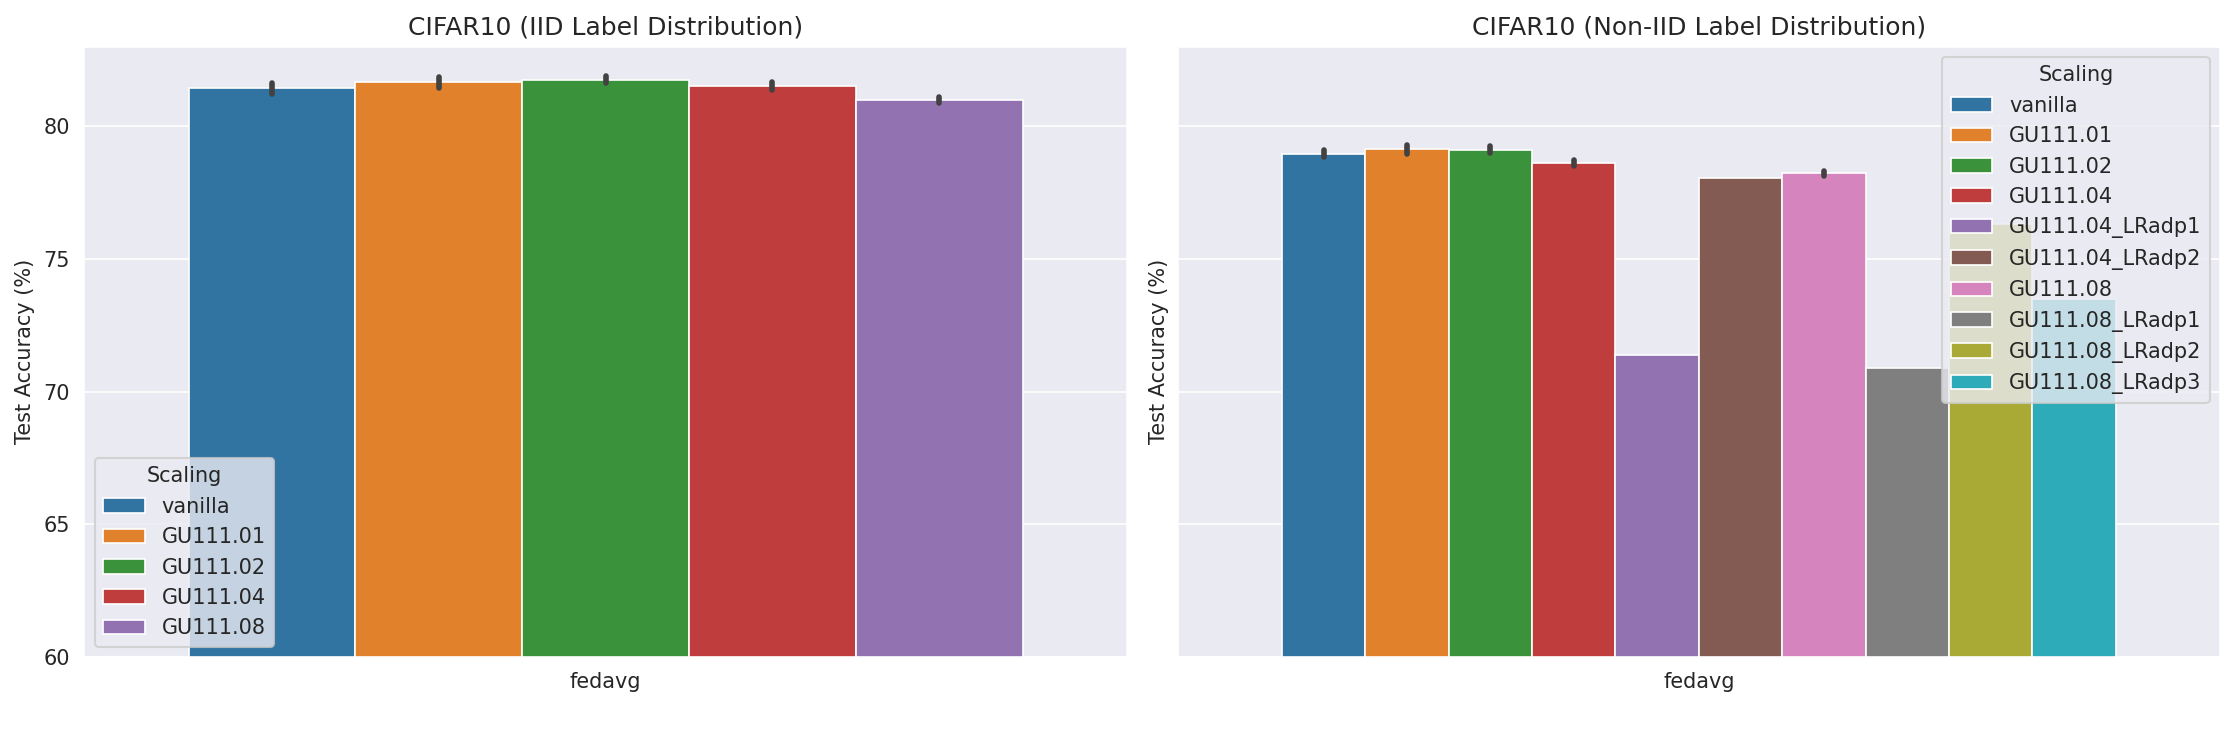

In [52]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi=150, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 499]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR10 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR10 (Non-IID Label Distribution)"

        temp = temp[(temp["Mode"] == "fedavg")]
        temp = temp[(temp["Scaling"] != "GU111.06") & (temp["Scaling"] != "GU111.1") & (temp["Mode"] != "scaffold")]
        
        ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([60, 83])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel(" ")
        ax.set_title(title)
    fig.tight_layout()
    plt.pause(0.1)

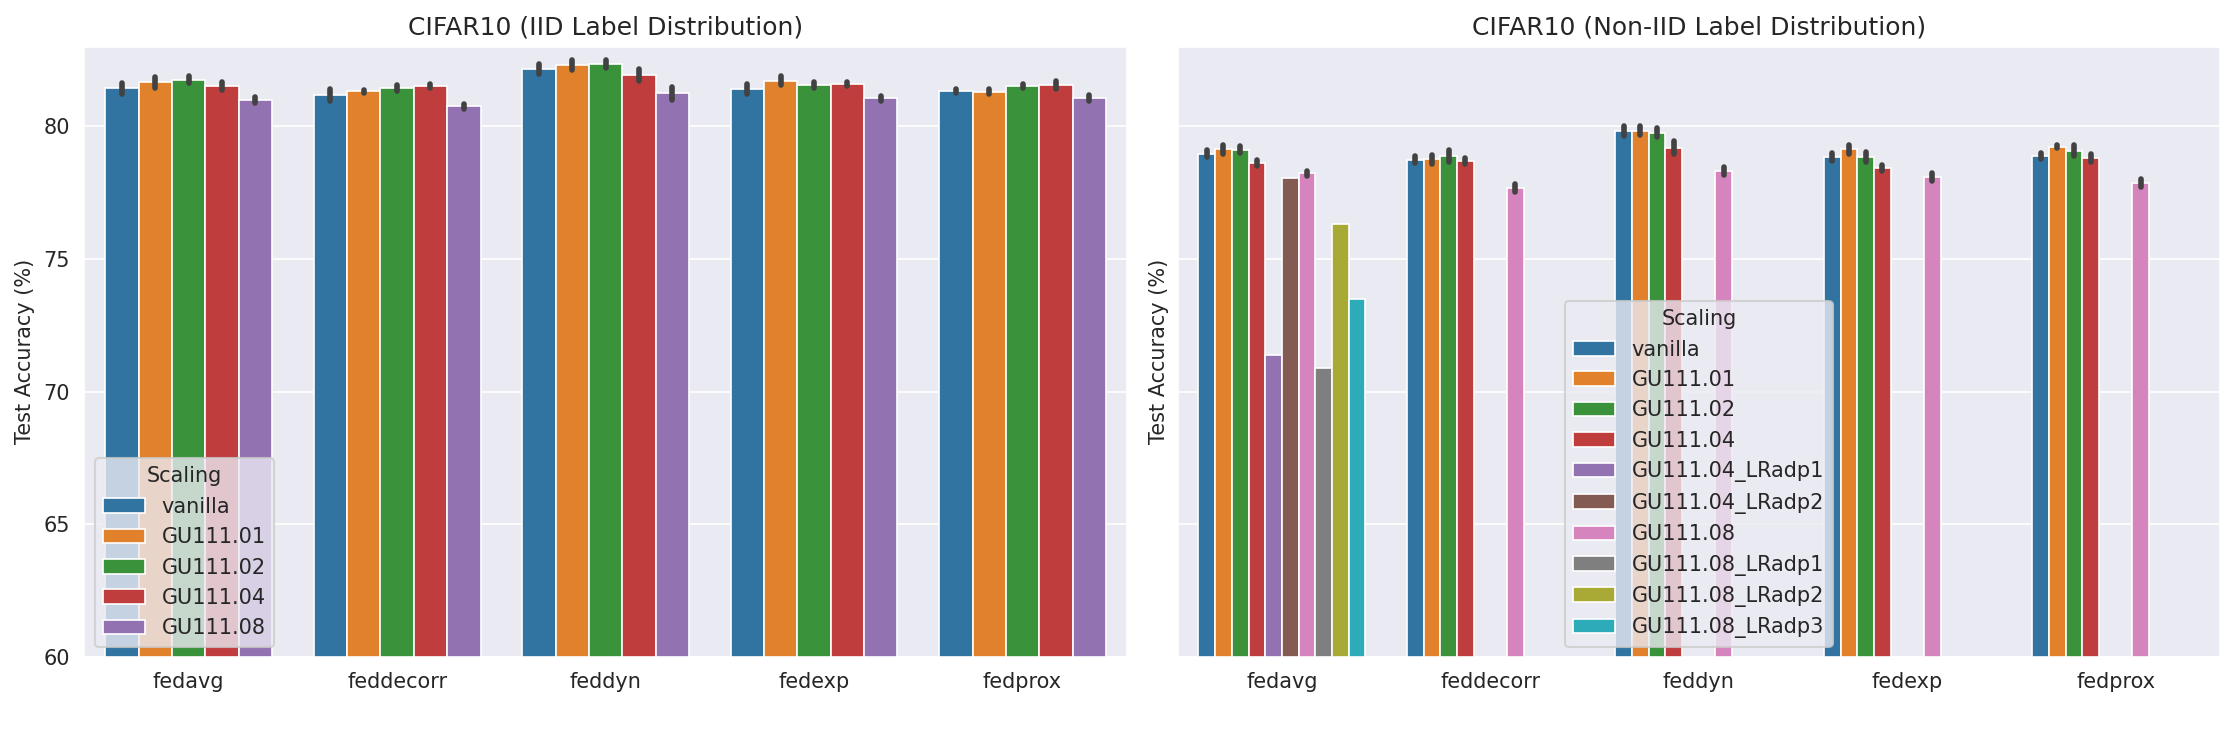

In [51]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi=150, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 499]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR10 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR10 (Non-IID Label Distribution)"

        temp = temp[(temp["Mode"] != "fedadagrad") & (temp["Mode"] != "fedavgm") & (temp["Mode"] != "scaffold")]
        temp = temp[(temp["Scaling"] != "GU111.06") & (temp["Scaling"] != "GU111.1") & (temp["Mode"] != "scaffold")]
        
        # replace_icon =   {"GU111.01": "+ FedBug (10%)", 
        #                   "GU111.02": "+ FedBug (20%)", 
        #                   "GU111.04": "+ FedBug (40%)",
        #                   "GU111.08": "+ FedBug (80%)",
        #                  }
        # sk = ["vanilla"] + list(replace_icon.keys())
        # temp = temp.set_index('Scaling').loc[sk].reset_index().replace({"Scaling": replace_icon})
        # replace_icon =   {"fedavg": "FedAvg", 
        #                   "fedprox":"FedProx", 
        #                   "feddyn": "FedDyn", 
        #                   "fedexp": "FedExp", 
        #                   "feddecorr": "FedDecorr", 
        #                  }
        # temp = temp.set_index('Mode').loc[replace_icon.keys()].reset_index().replace({"Mode": replace_icon})

        ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([60, 83])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel(" ")
        ax.set_title(title)
    fig.tight_layout()
    plt.pause(0.1)

In [45]:
temp = temp.pivot_table(index="mode", columns="Scaling", values="a3", aggfunc='mean')
temp

Scaling,FedBug (10%),FedBug (20%),FedBug (40%),FedBug (80%),vanilla
mode,,,,,
fedavg,81.443333,81.640000,81.313333,81.116667,80.770
feddecorr,82.225000,81.720000,81.915000,81.545000,81.380
feddyn,84.366667,83.913333,83.730000,83.590000,83.590
fedexp,81.185000,81.960000,81.350000,81.465000,81.000
fedprox,81.190000,81.503333,81.613333,81.706667,81.335


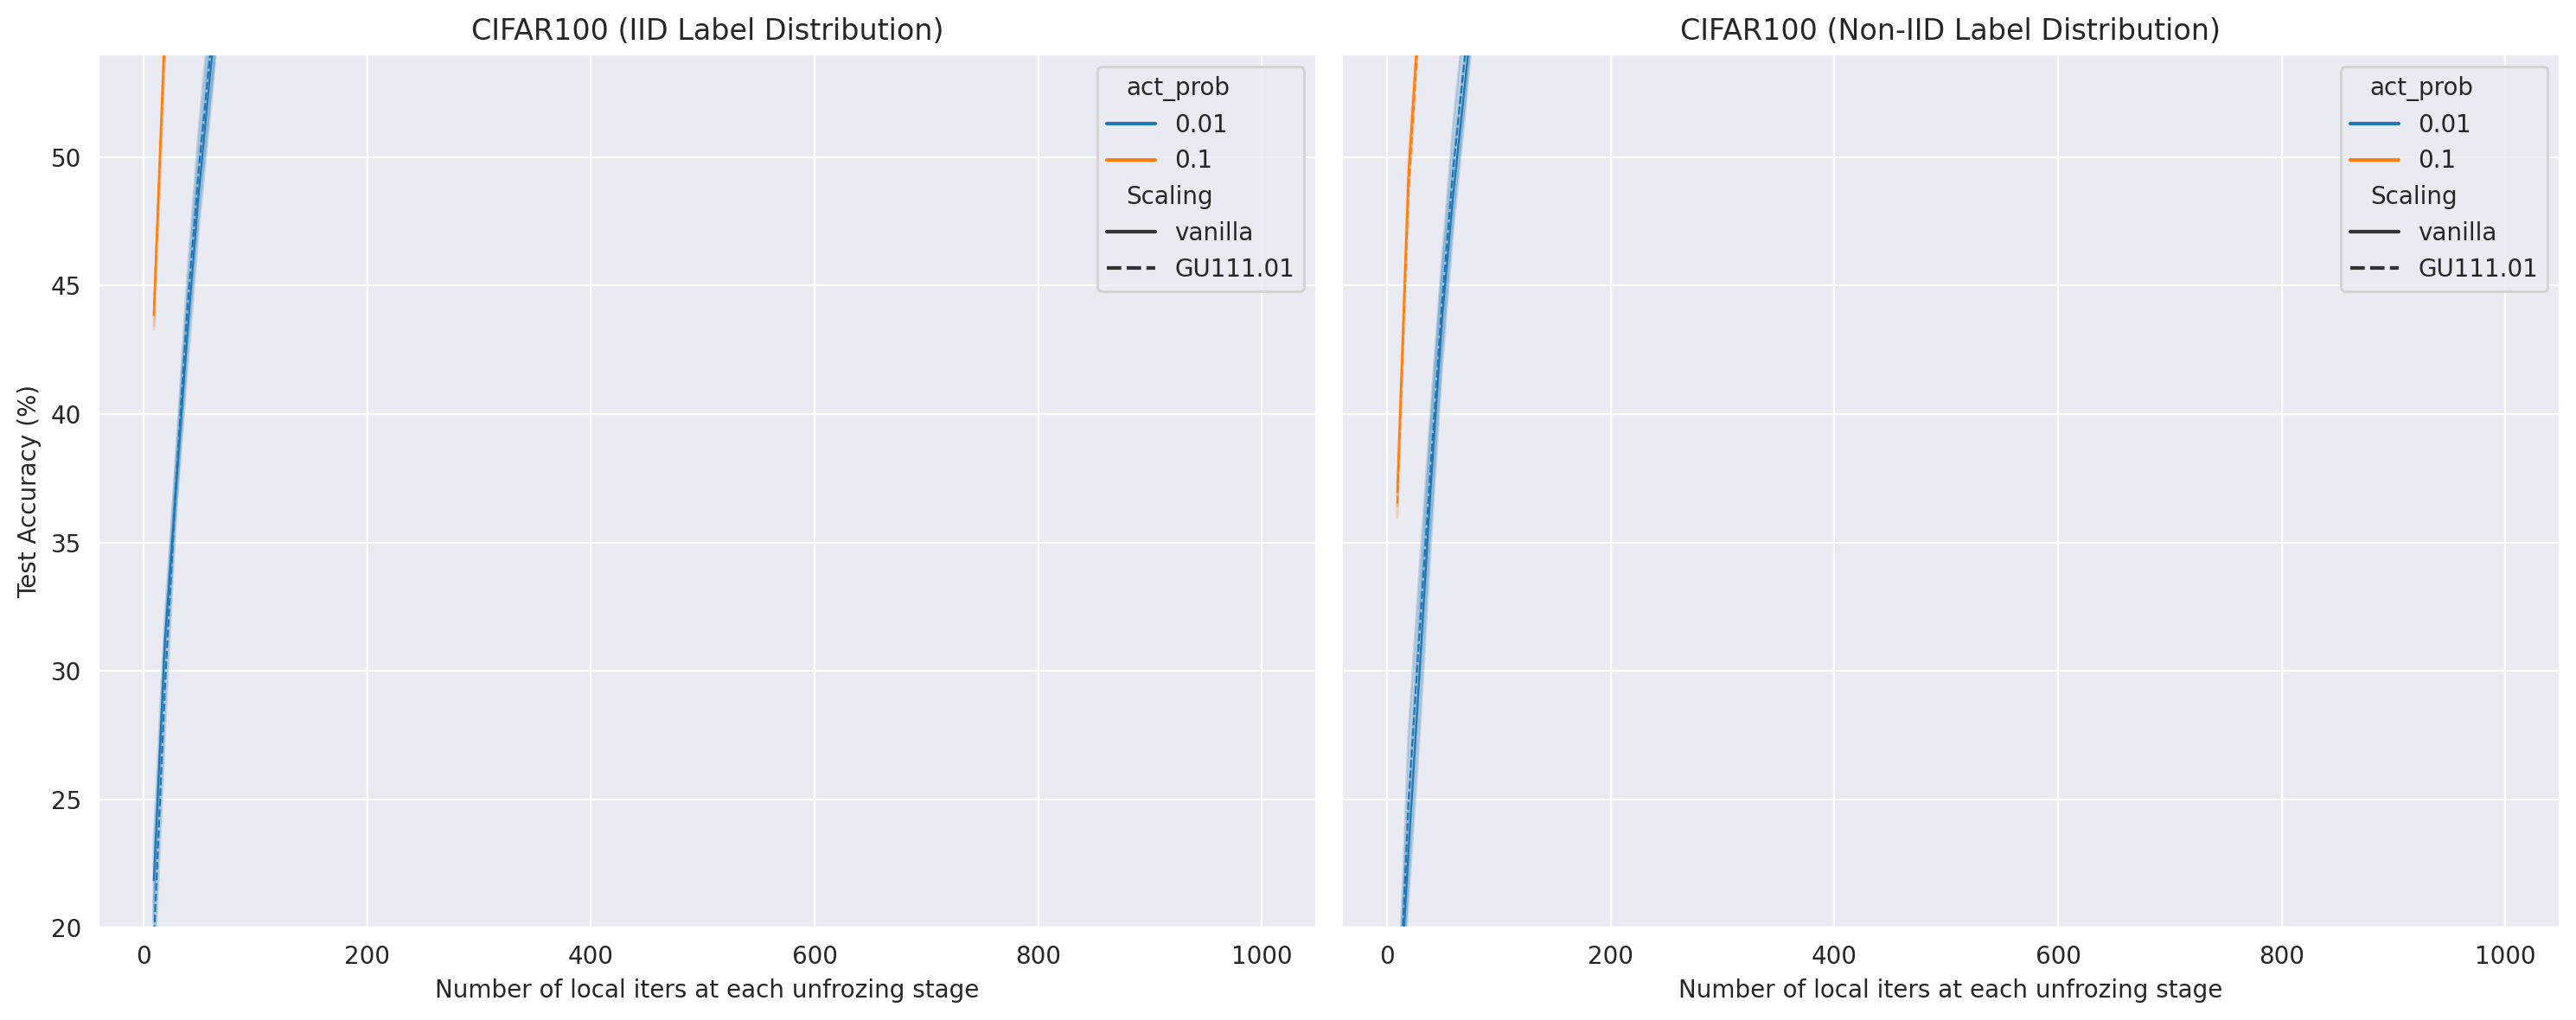

In [8]:
data_temp = load_data("../Output_GU_C100/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        # temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["Scaling"] == "vanilla"]
        # temp = temp[temp["epoch"] == 999]
        temp = temp[temp["Mode"] == "fedavg"]
        temp = temp[(temp["Scaling"] == "GU111.01") | (temp["Scaling"] == "vanilla")]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR100 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR100 (Non-IID Label Distribution)"
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="act_prob", style="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([20, 54])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
    fig.tight_layout()
    plt.pause(0.1)

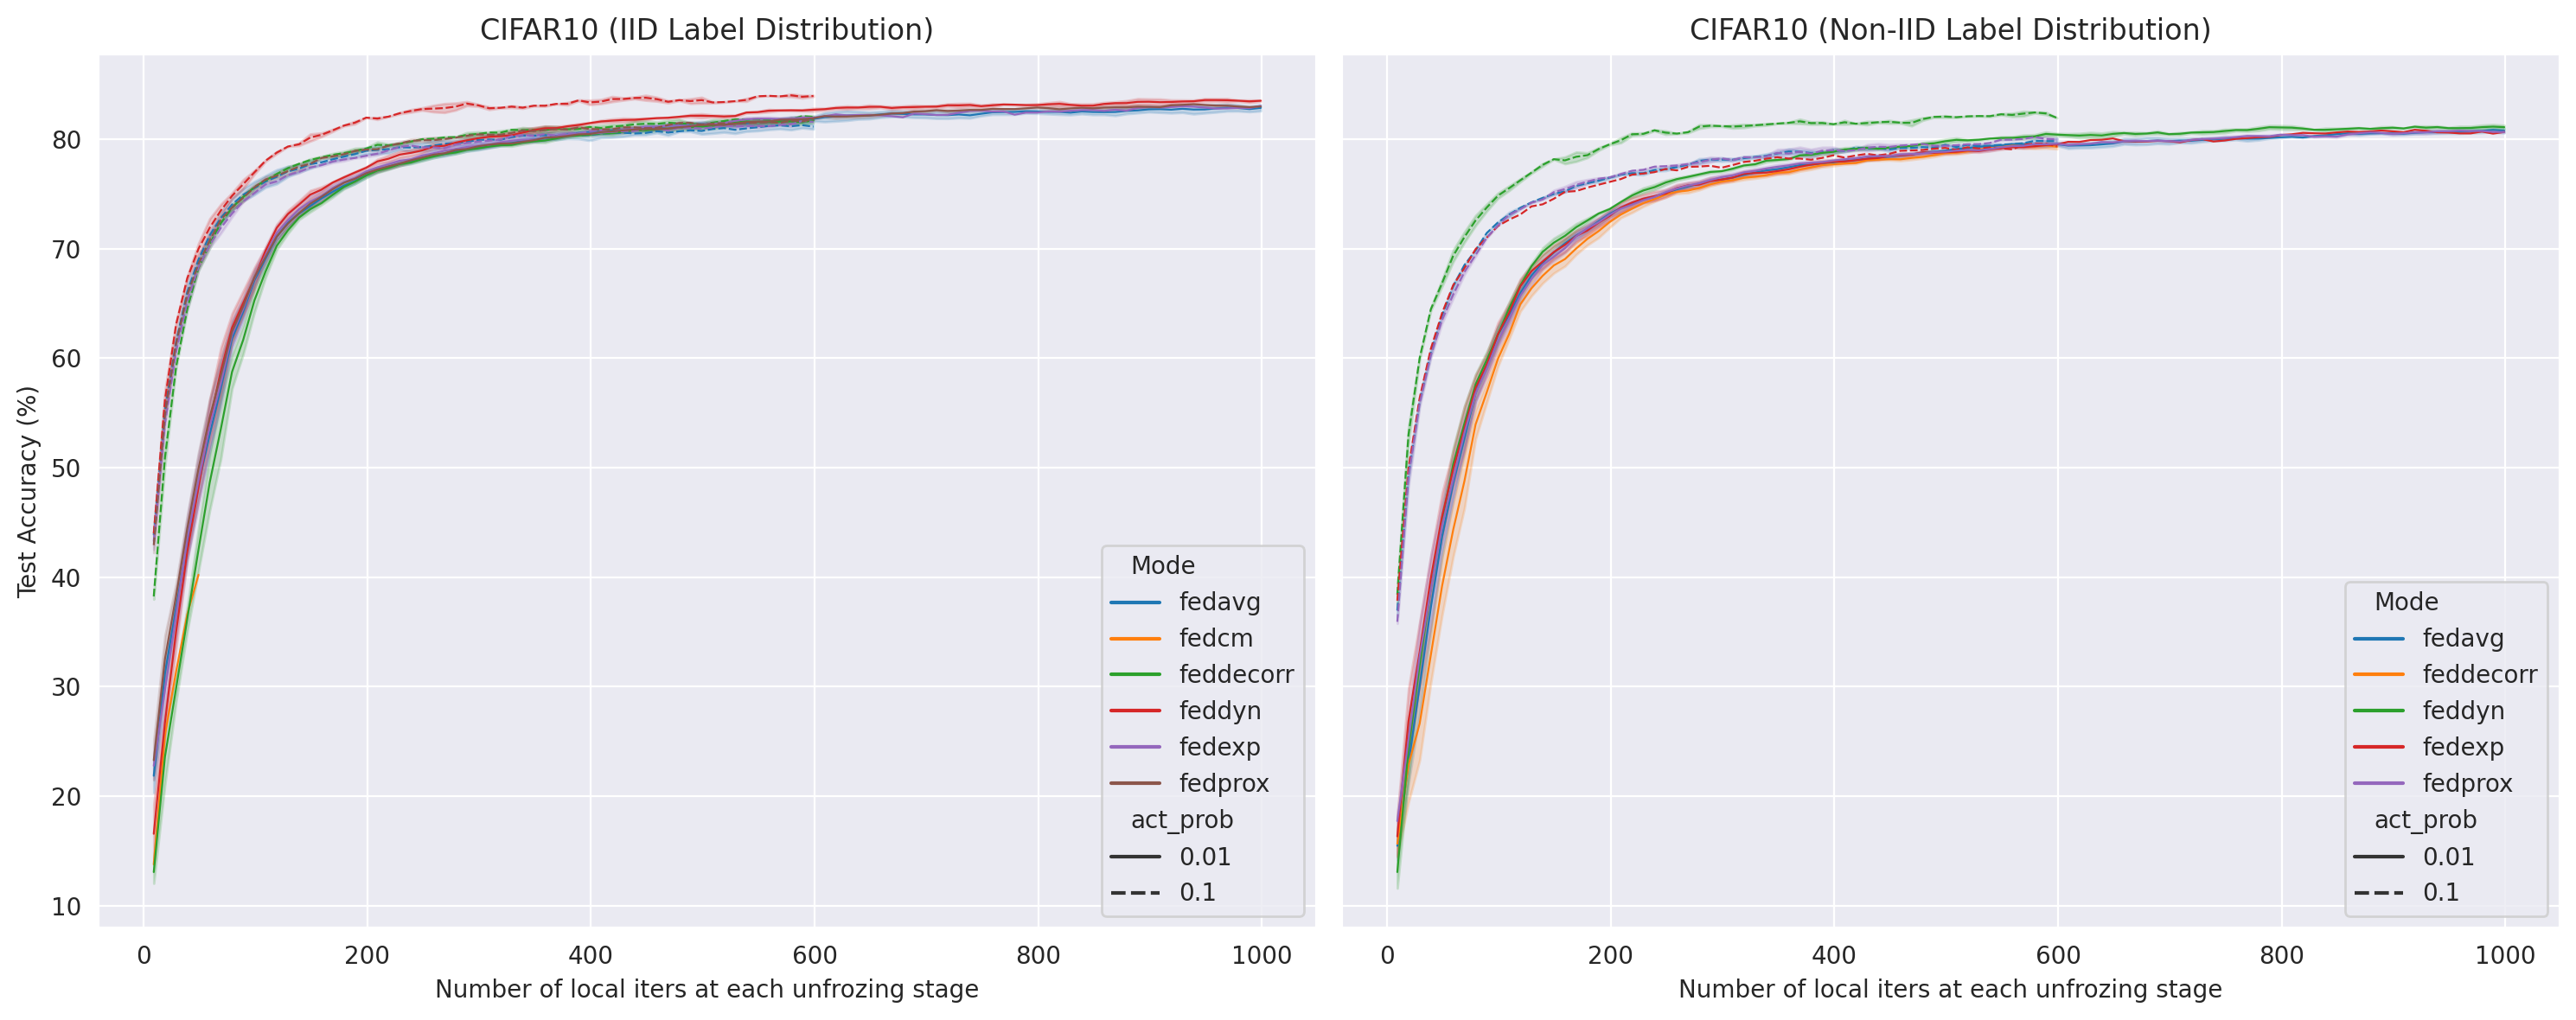

In [9]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        # temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["Scaling"] == "vanilla"]
        # temp = temp[temp["epoch"] == 999]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR10 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR10 (Non-IID Label Distribution)"
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="act_prob", palette="tab10", errorbar="se", linewidth = 0.8)
        # ax.set_ylim([70, 85])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
    fig.tight_layout()
    plt.pause(0.1)

### GU 121

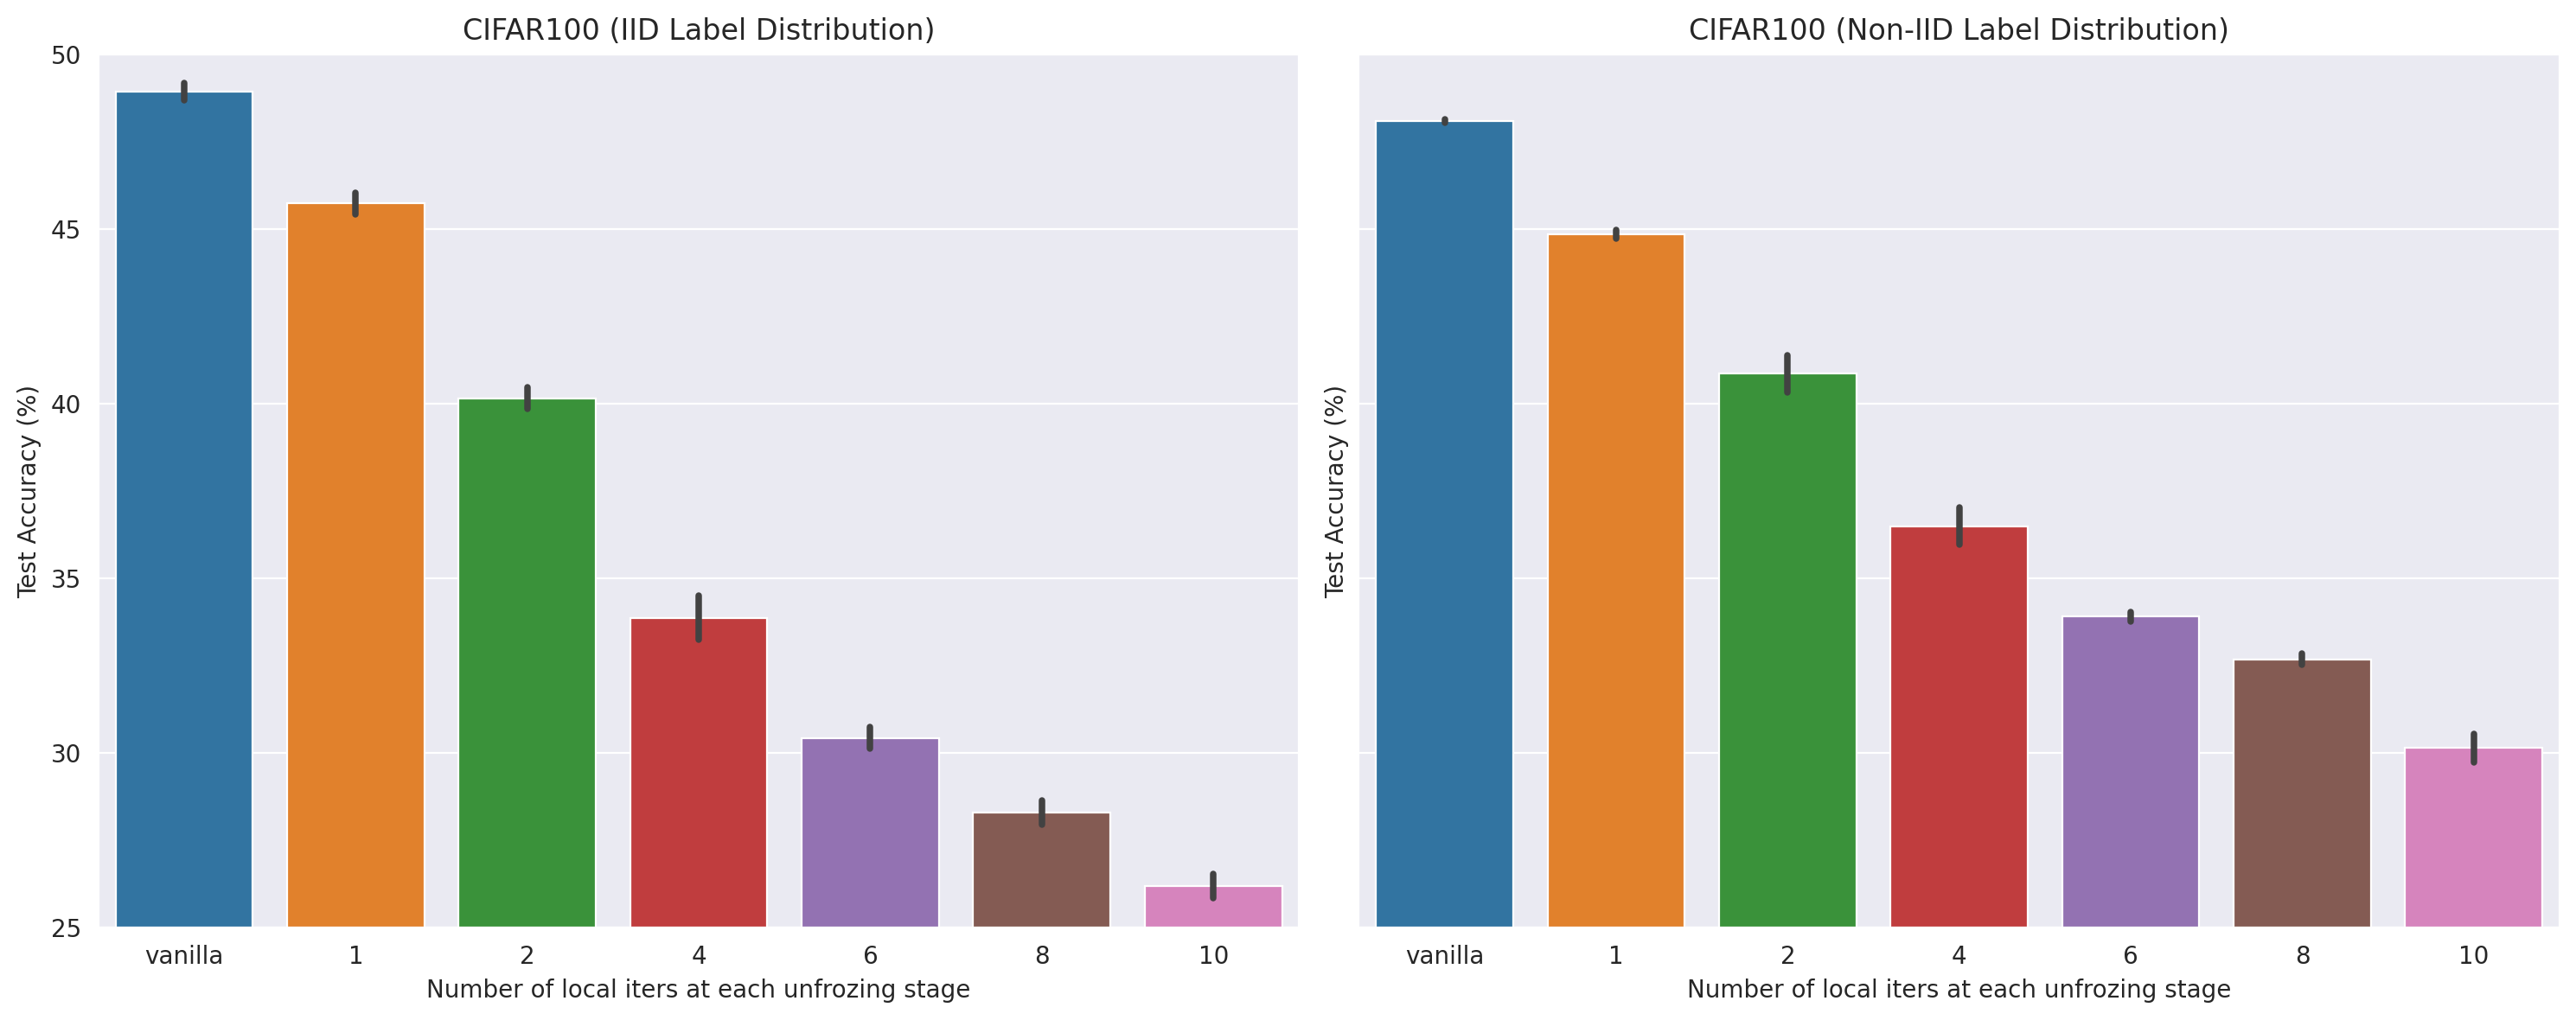

In [10]:
data_temp = load_data("../Output_GU_C100/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR100 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR100 (Non-IID Label Distribution)"
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU112.01": "1", 
                          "GU112.02": "2", 
                          "GU112.04": "4", 
                          "GU112.06": "6", 
                          "GU112.08": "8", 
                          "GU112.1": "10"
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        temp = temp.replace({"Scaling": replace_icon})
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([25, 50])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GGU 111

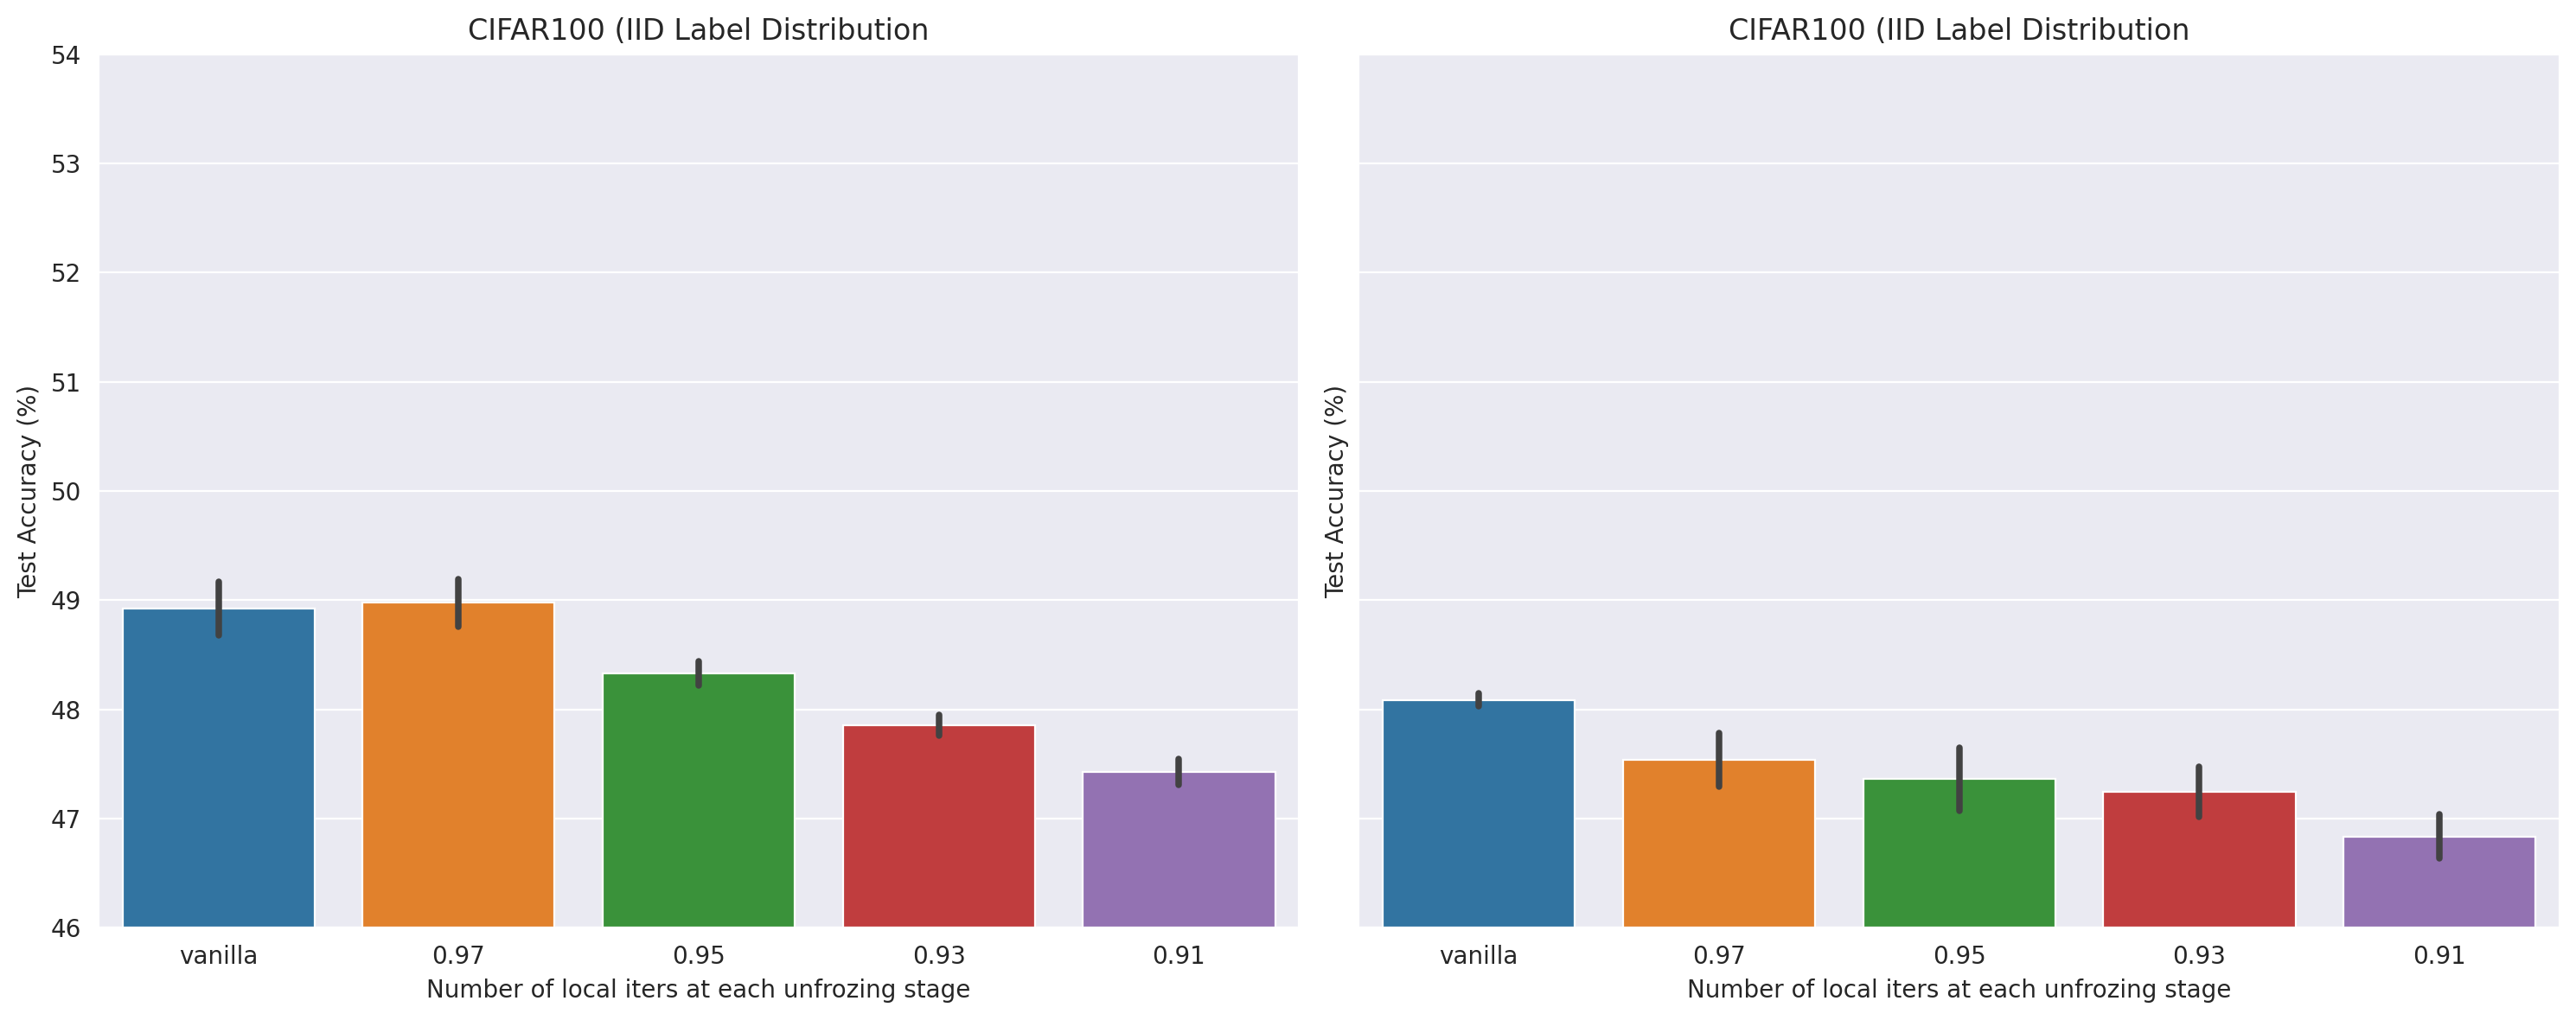

In [11]:
data_temp = load_data("../Output_GU_C100/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU111.97": "0.97", 
                          "GGU111.95": "0.95", 
                          "GGU111.93": "0.93", 
                          "GGU111.91": "0.91",
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        temp = temp.replace({"Scaling": replace_icon})
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([46, 54])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GGU 121

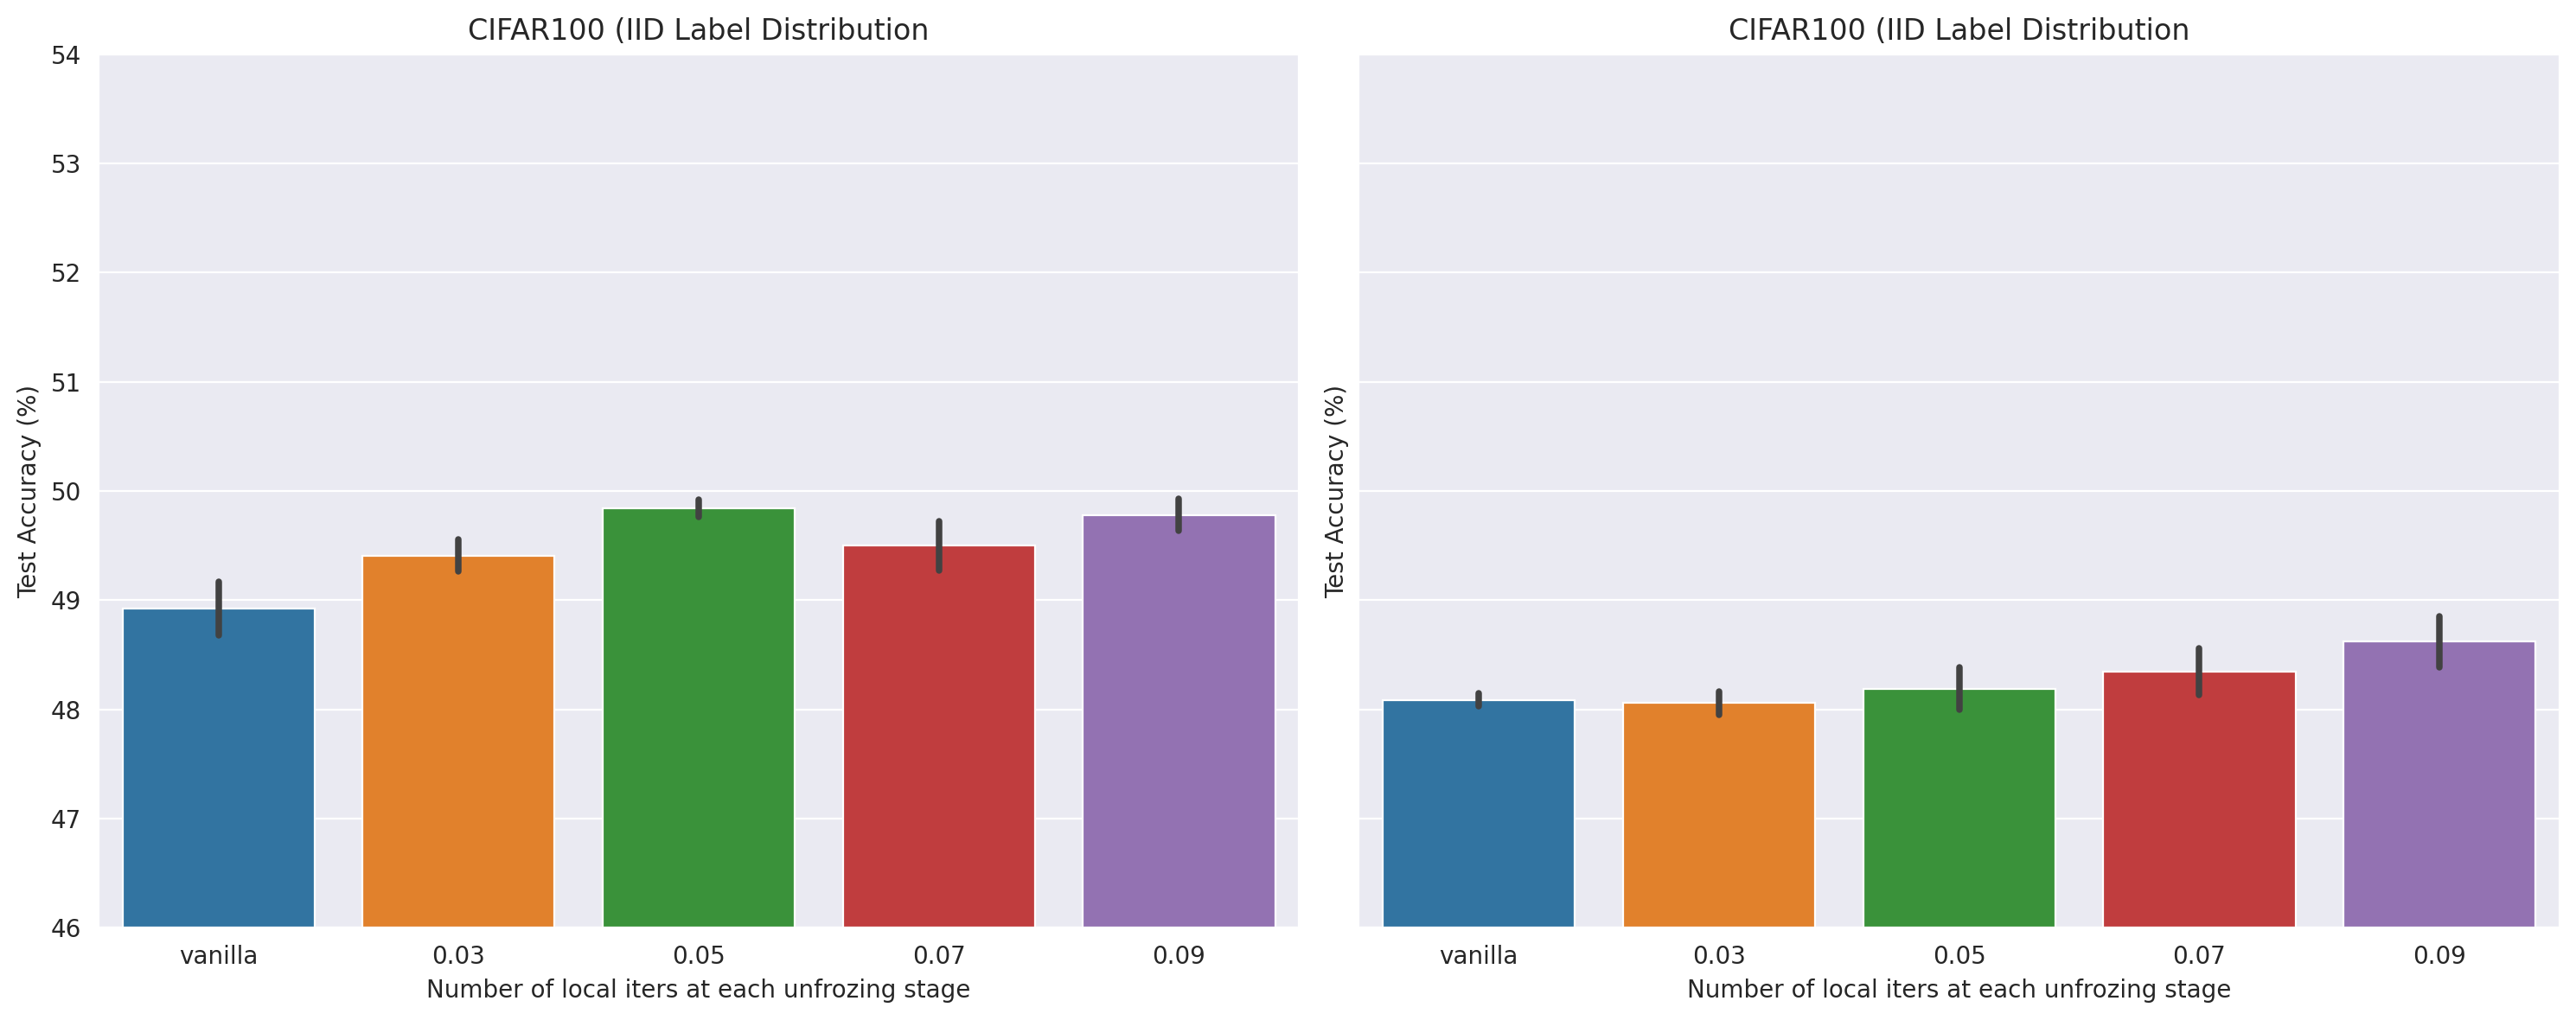

In [12]:
data_temp = load_data("../Output_GU_C100/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU121.03": "0.03", 
                          "GGU121.05": "0.05", 
                          "GGU121.07": "0.07", 
                          "GGU121.09": "0.09",
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        temp = temp.replace({"Scaling": replace_icon})
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([46, 54])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)


# CIFAR10

### All BarPlot

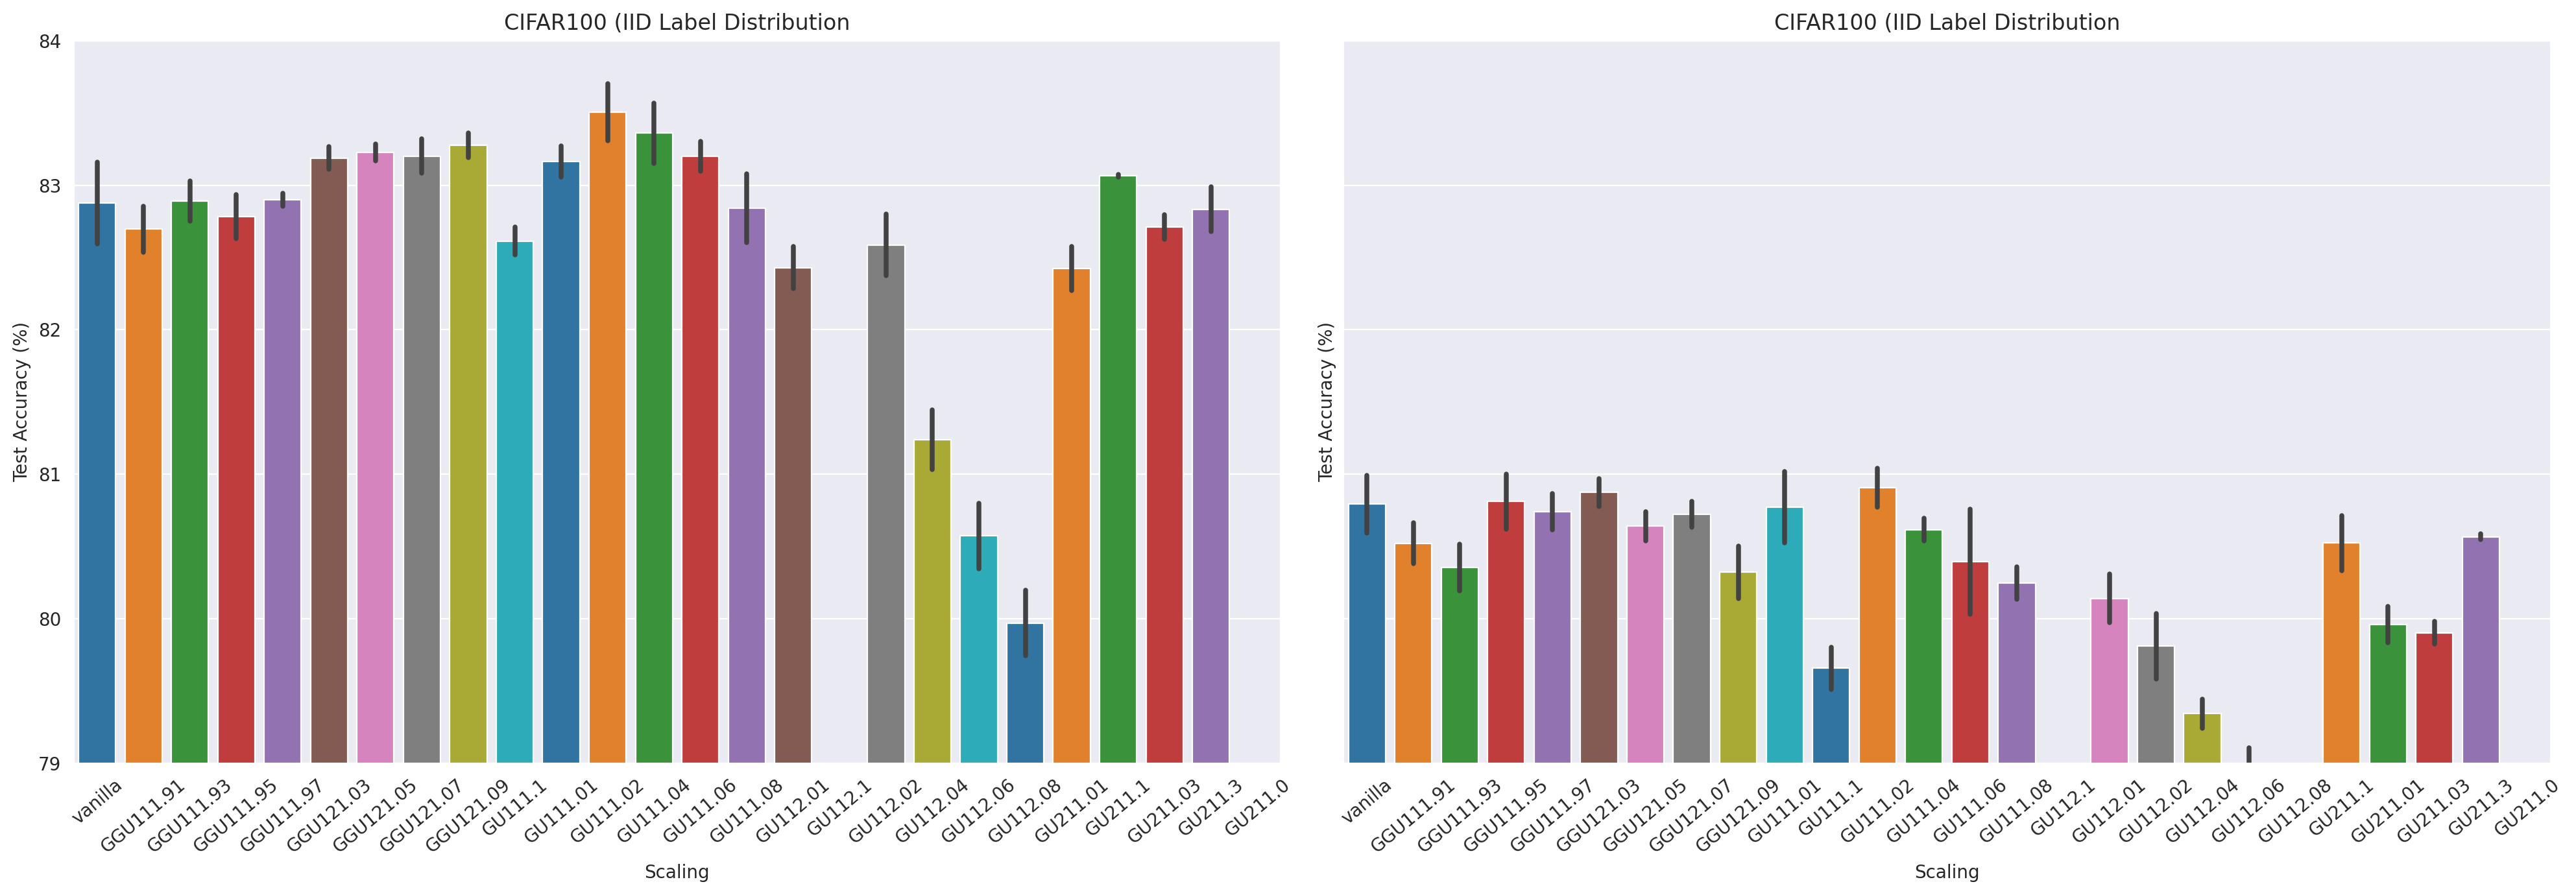

In [13]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
#         replace_icon =   {"GU111.01": "1", 
#                           "GU111.02": "2", 
#                           "GU111.04": "4", 
#                           "GU111.06": "6", 
#                           "GU111.08": "8", 
#                           "GU111.1": "10"
#                          }
        
#         sk = ["vanilla"] + list(replace_icon.keys())
#         temp = temp.set_index('Scaling').loc[sk].reset_index()
        
#         temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 84])
        ax.set_ylabel("Test Accuracy (%)")
        # ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GU 111

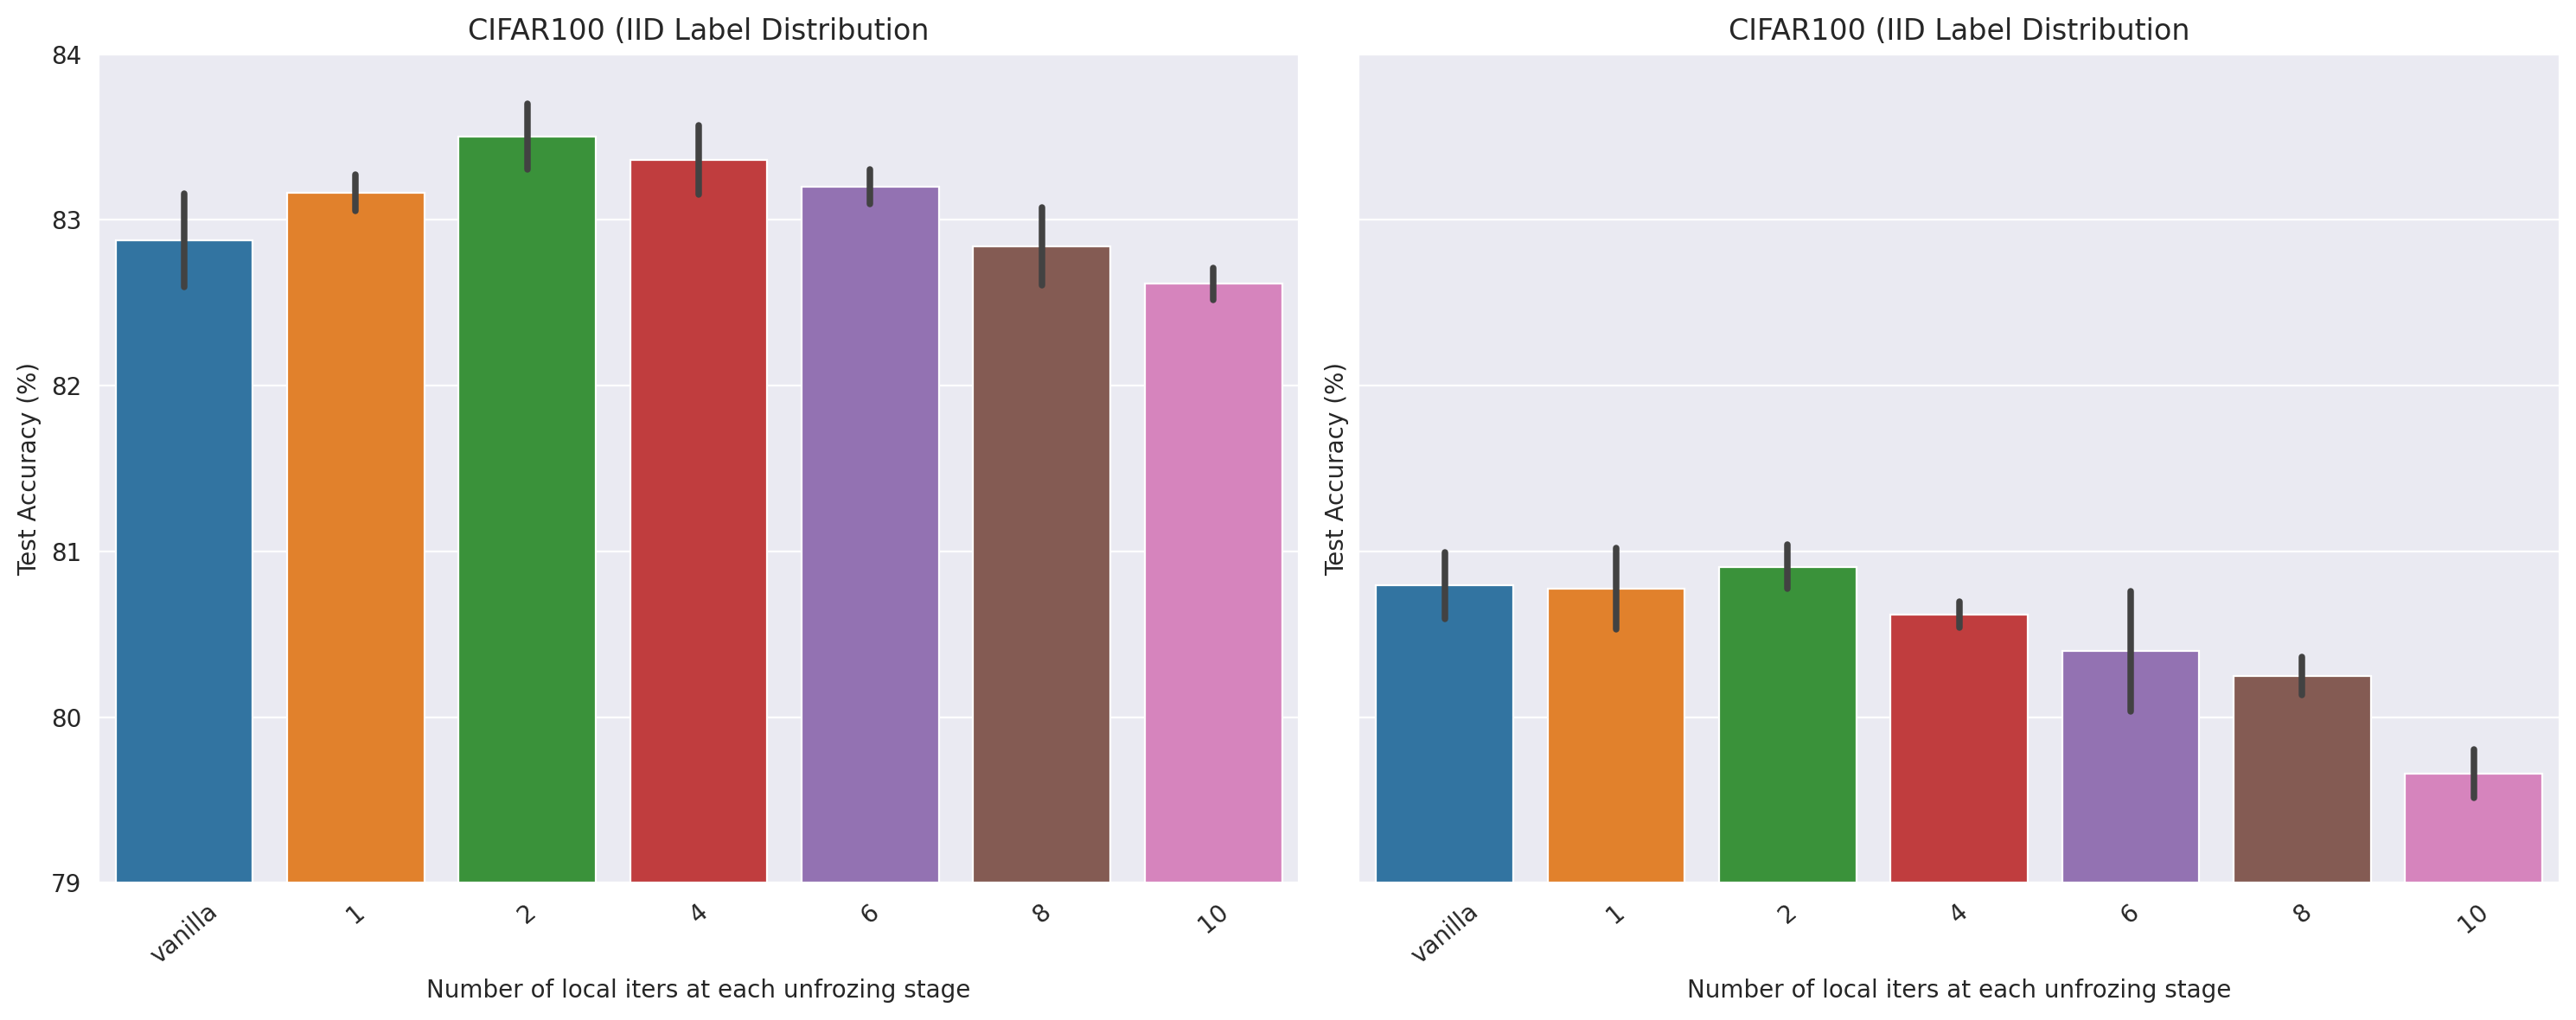

In [14]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU111.01": "1", 
                          "GU111.02": "2", 
                          "GU111.04": "4", 
                          "GU111.06": "6", 
                          "GU111.08": "8", 
                          "GU111.1": "10"
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 84])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title("CIFAR100 (IID Label Distribution")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GU112

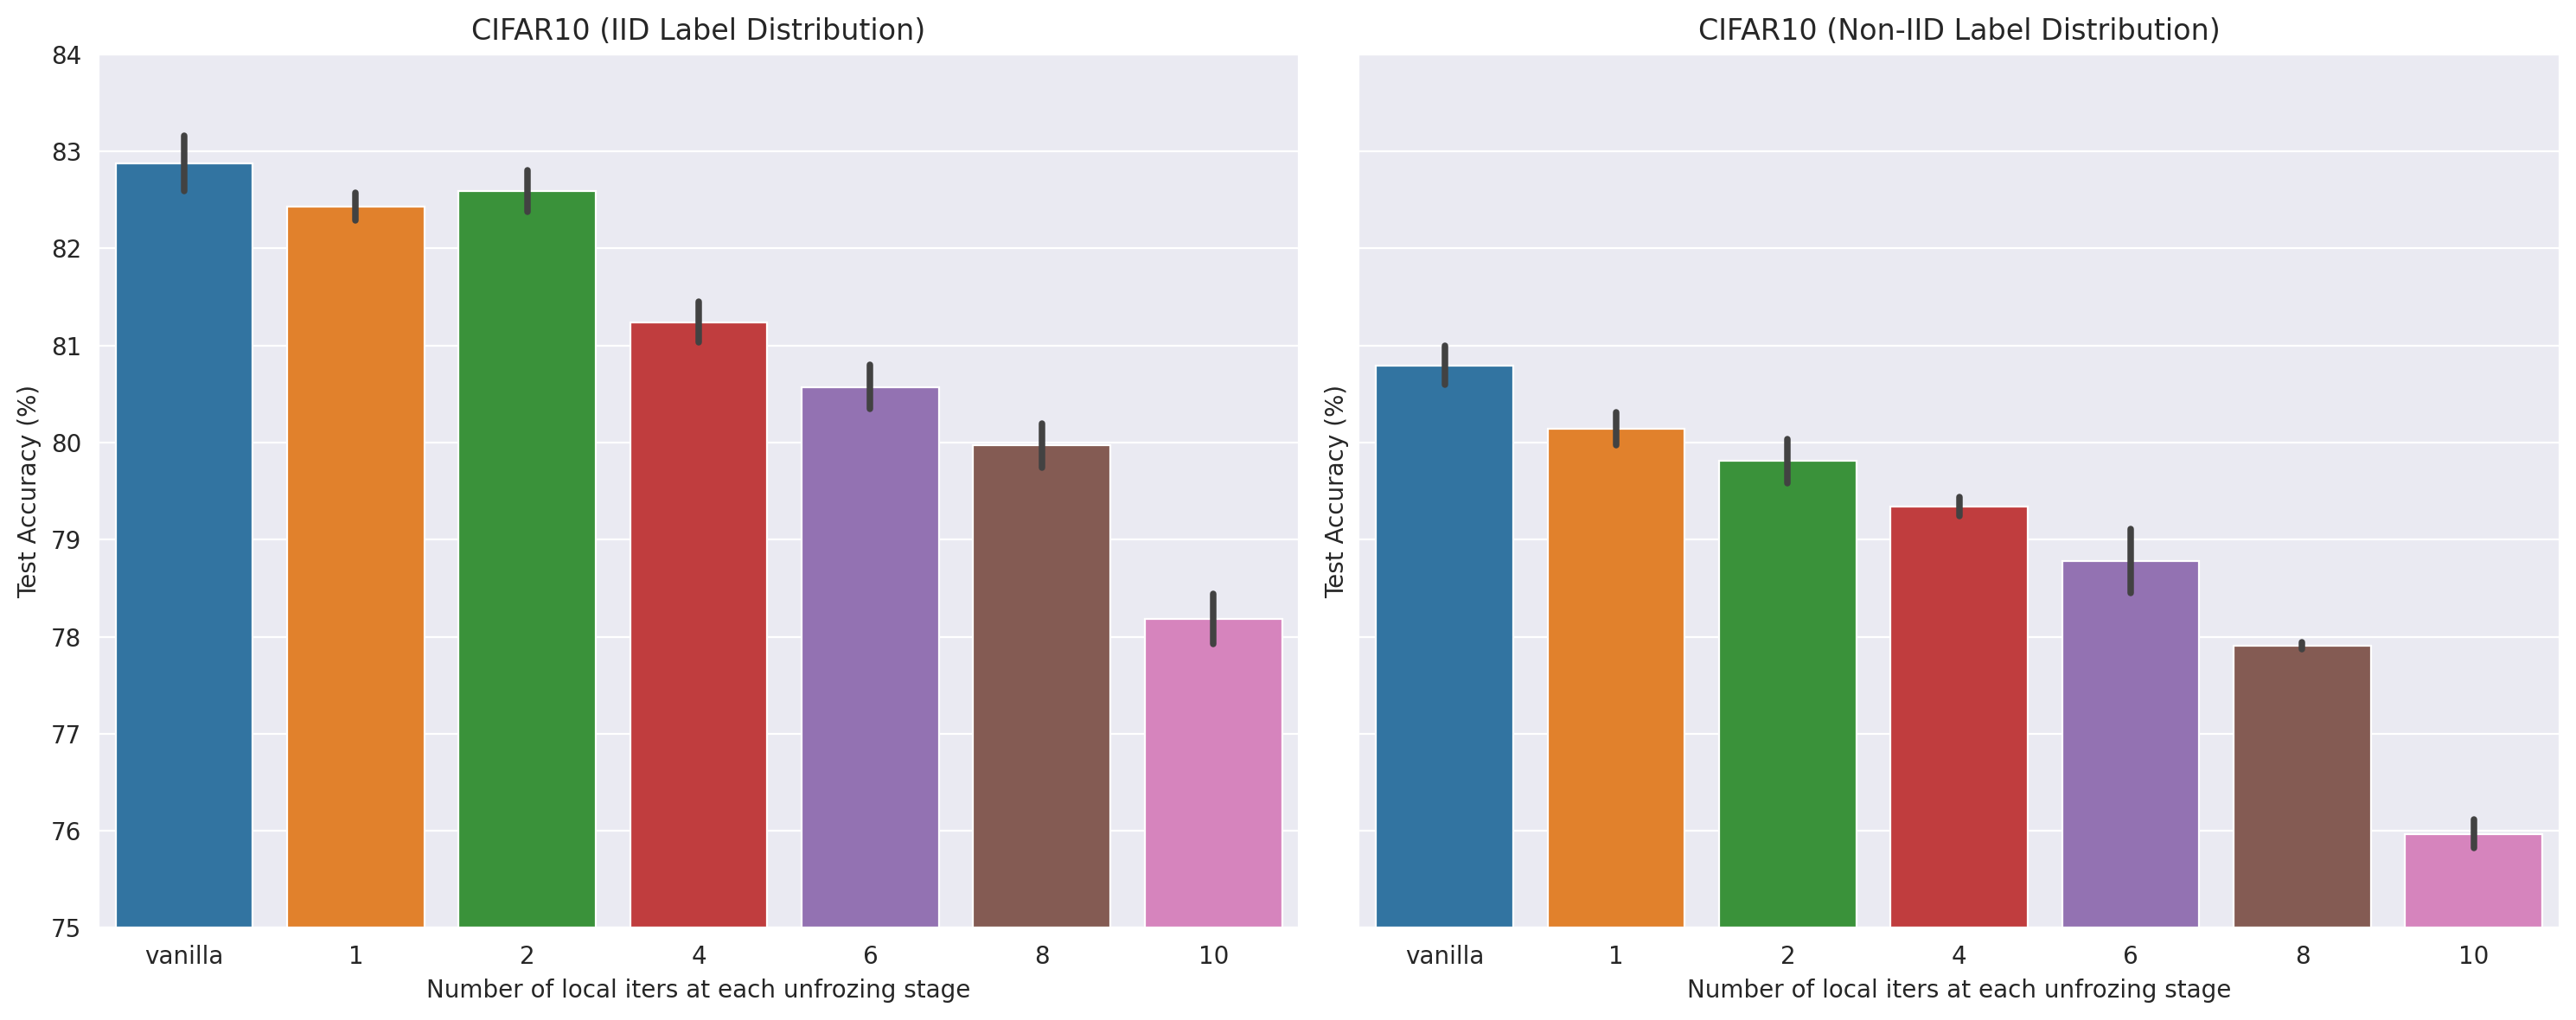

In [15]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(15,6), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR10 (IID Label Distribution)"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR10 (Non-IID Label Distribution)"
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU112.01": "1", 
                          "GU112.02": "2", 
                          "GU112.04": "4", 
                          "GU112.06": "6", 
                          "GU112.08": "8", 
                          "GU112.1": "10"
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        temp = temp.replace({"Scaling": replace_icon})
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([75, 84])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Number of local iters at each unfrozing stage")
        ax.set_title(title)
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GU 211

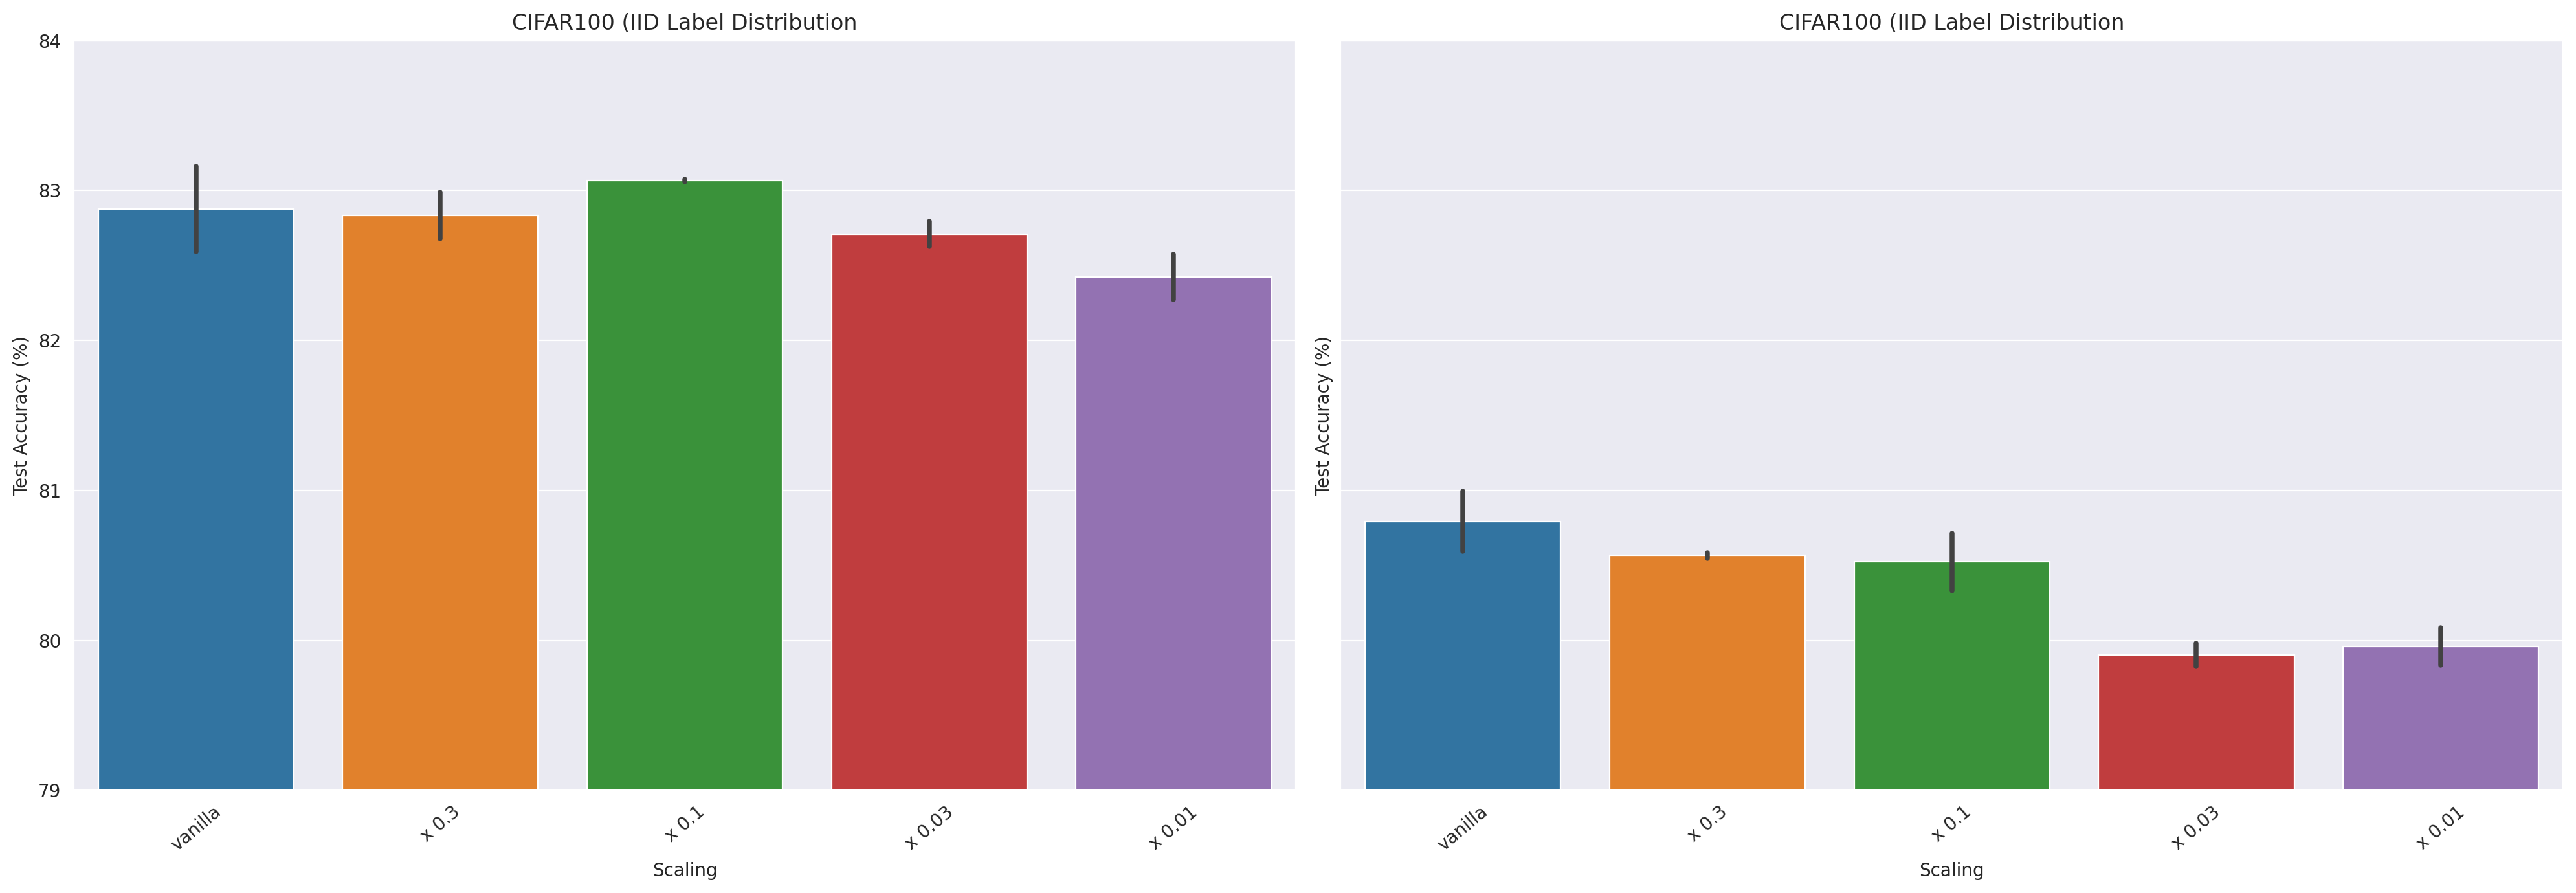

In [16]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU211.3": "x 0.3", 
                          "GU211.1": "x 0.1", 
                          "GU211.03": "x 0.03", 
                          "GU211.01": "x 0.01", 
                        #   "GU211.0": "x 0.0", 
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 84])
        ax.set_ylabel("Test Accuracy (%)")
        # ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GU 112

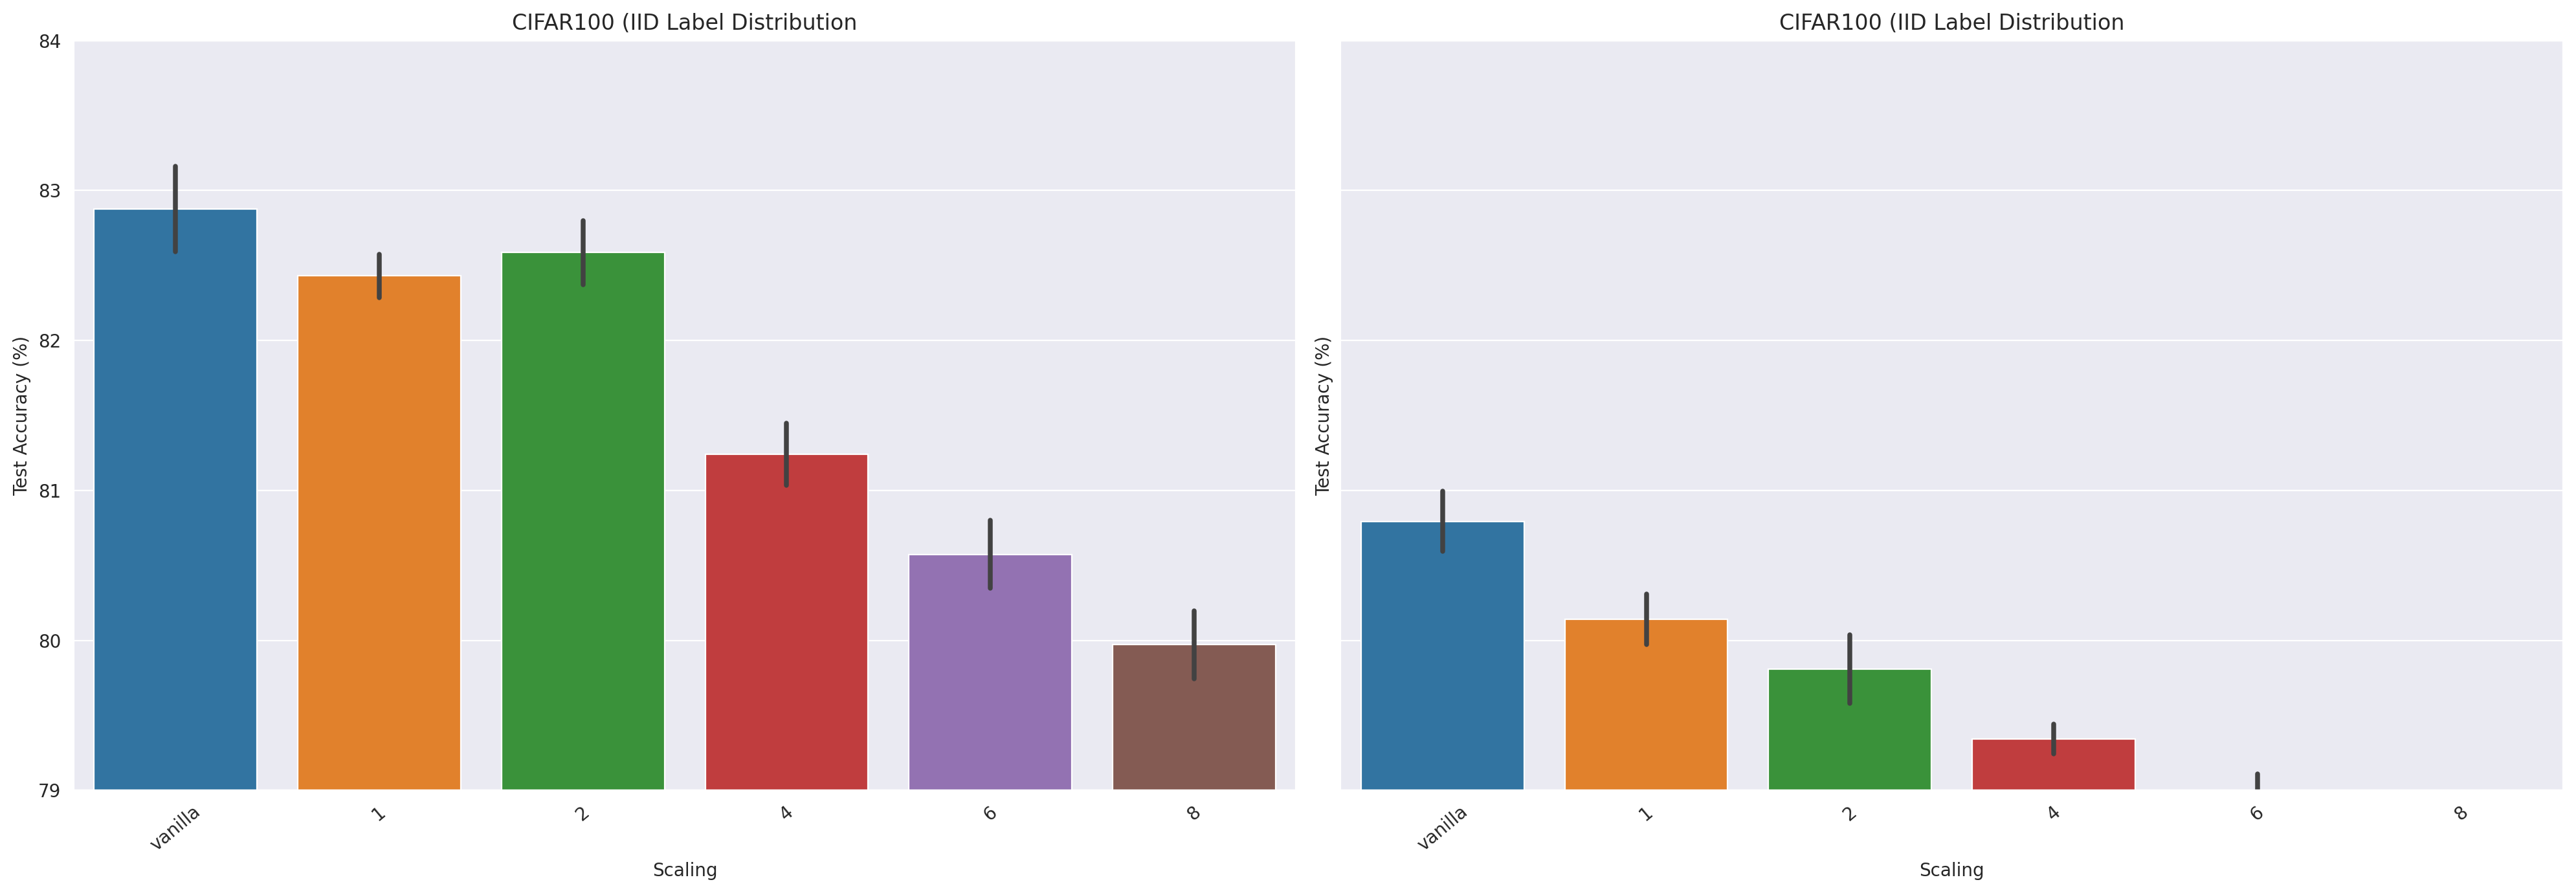

In [17]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU112.01": "1", 
                          "GU112.02": "2", 
                          "GU112.04": "4", 
                          "GU112.06": "6", 
                          "GU112.08": "8", 
                        #   "GU112.1": "10"
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 84])
        ax.set_ylabel("Test Accuracy (%)")
        # ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

### GGU 121

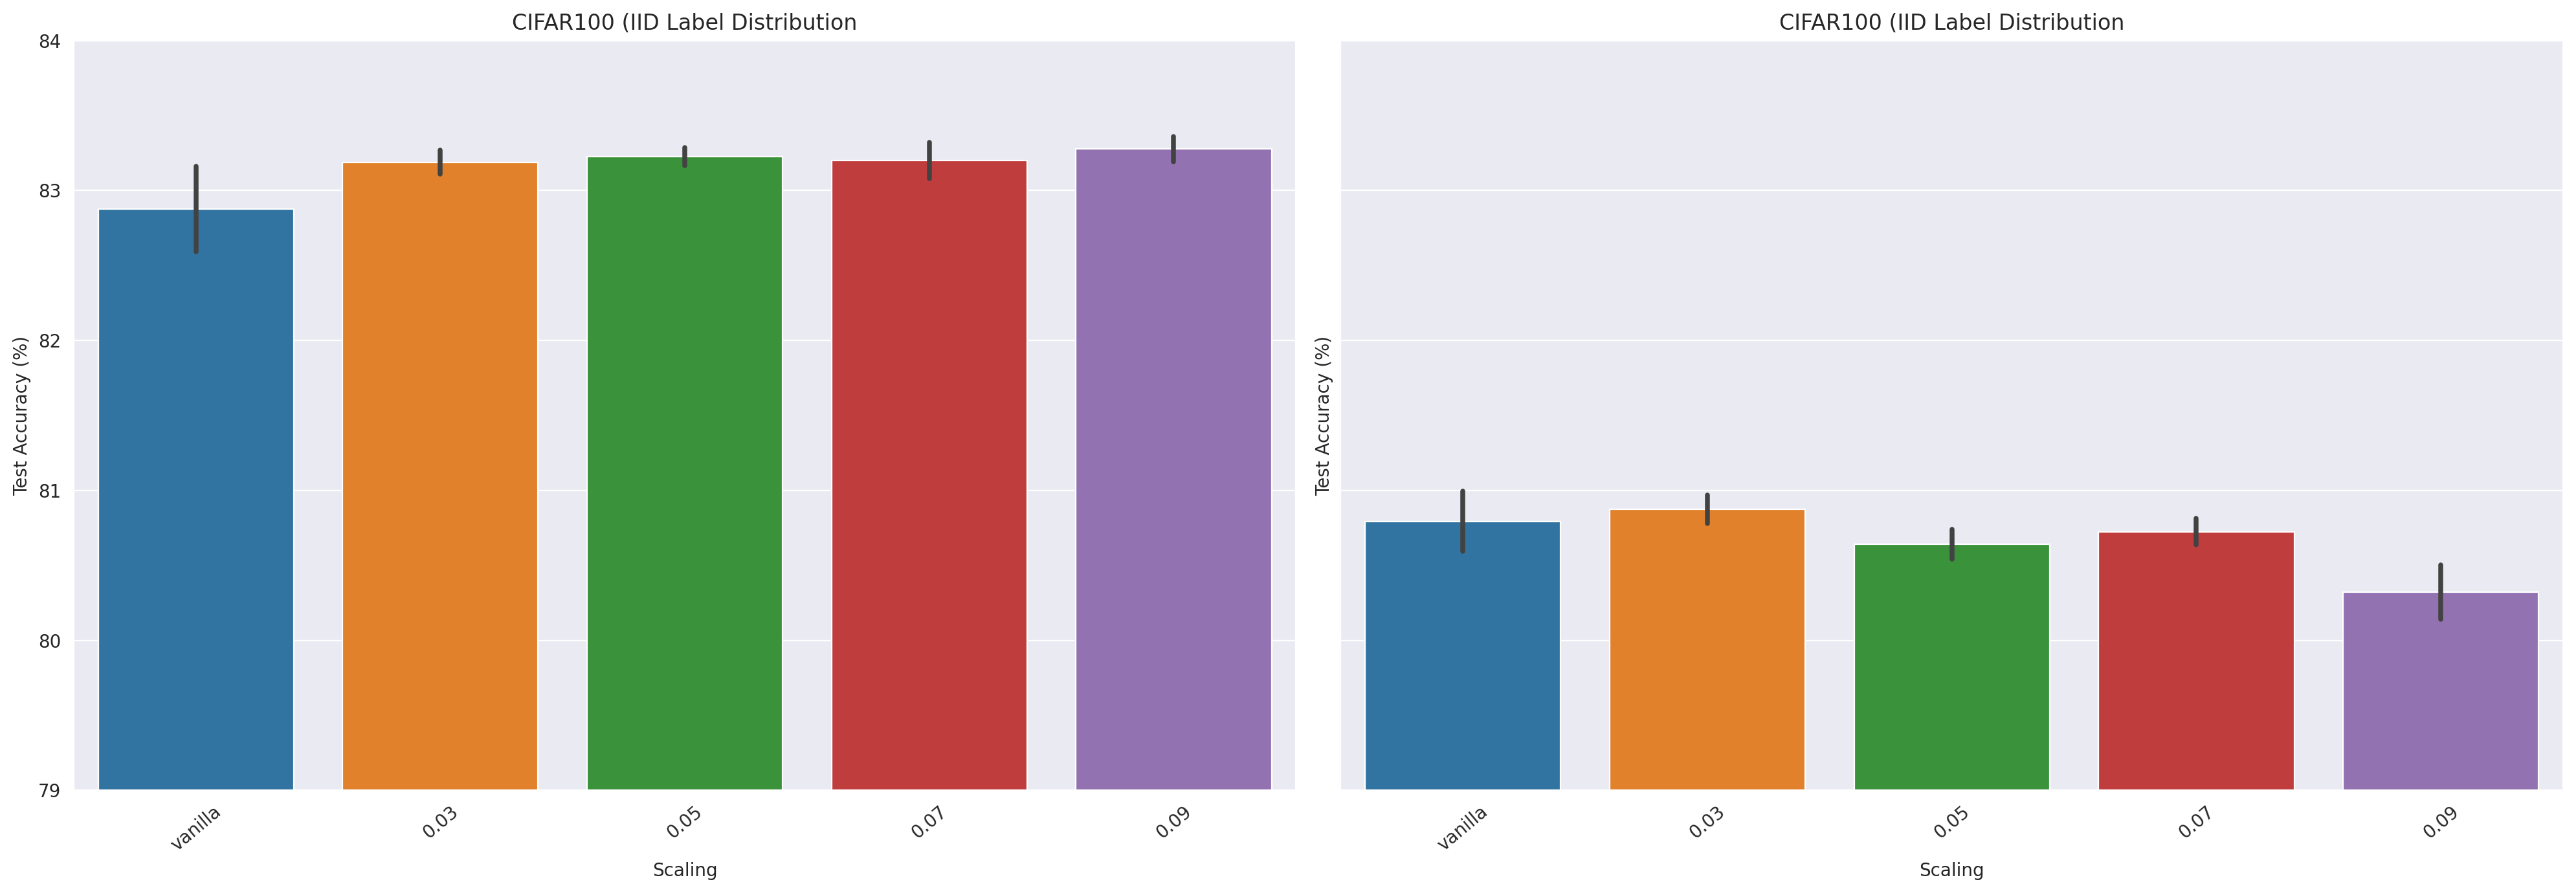

In [18]:
data_temp = load_data("../Output_GU_C10/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU121.03": "0.03", 
                          "GGU121.05": "0.05", 
                          "GGU121.07": "0.07", 
                          "GGU121.09": "0.09",
                         }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 84])
        ax.set_ylabel("Test Accuracy (%)")
        # ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)